In [194]:
# Importing the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [195]:
sample_bike_data = pd.read_csv('day.csv')
sample_bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [196]:
sample_bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [197]:
sample_bike_data.shape

(730, 16)

In [198]:
sample_bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [199]:
sample_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [200]:
sample_bike_data.size

11680

In [201]:
sample_bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [202]:
sample_bike_data.drop(['instant'],axis=1,inplace=True)
sample_bike_data.drop(['dteday'],axis=1,inplace=True)
sample_bike_data.drop(['casual'],axis=1,inplace=True)
sample_bike_data.drop(['registered'],axis=1,inplace=True)

In [203]:
sample_bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [204]:
sample_bike_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [205]:
sample_bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [206]:
sample_bike_data.season = sample_bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [207]:
sample_bike_data.month = sample_bike_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [208]:
sample_bike_data.weekday = sample_bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [209]:
sample_bike_data.weathersit = sample_bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [210]:
sample_bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [211]:
sample_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<Axes: xlabel='weathersit', ylabel='cnt'>

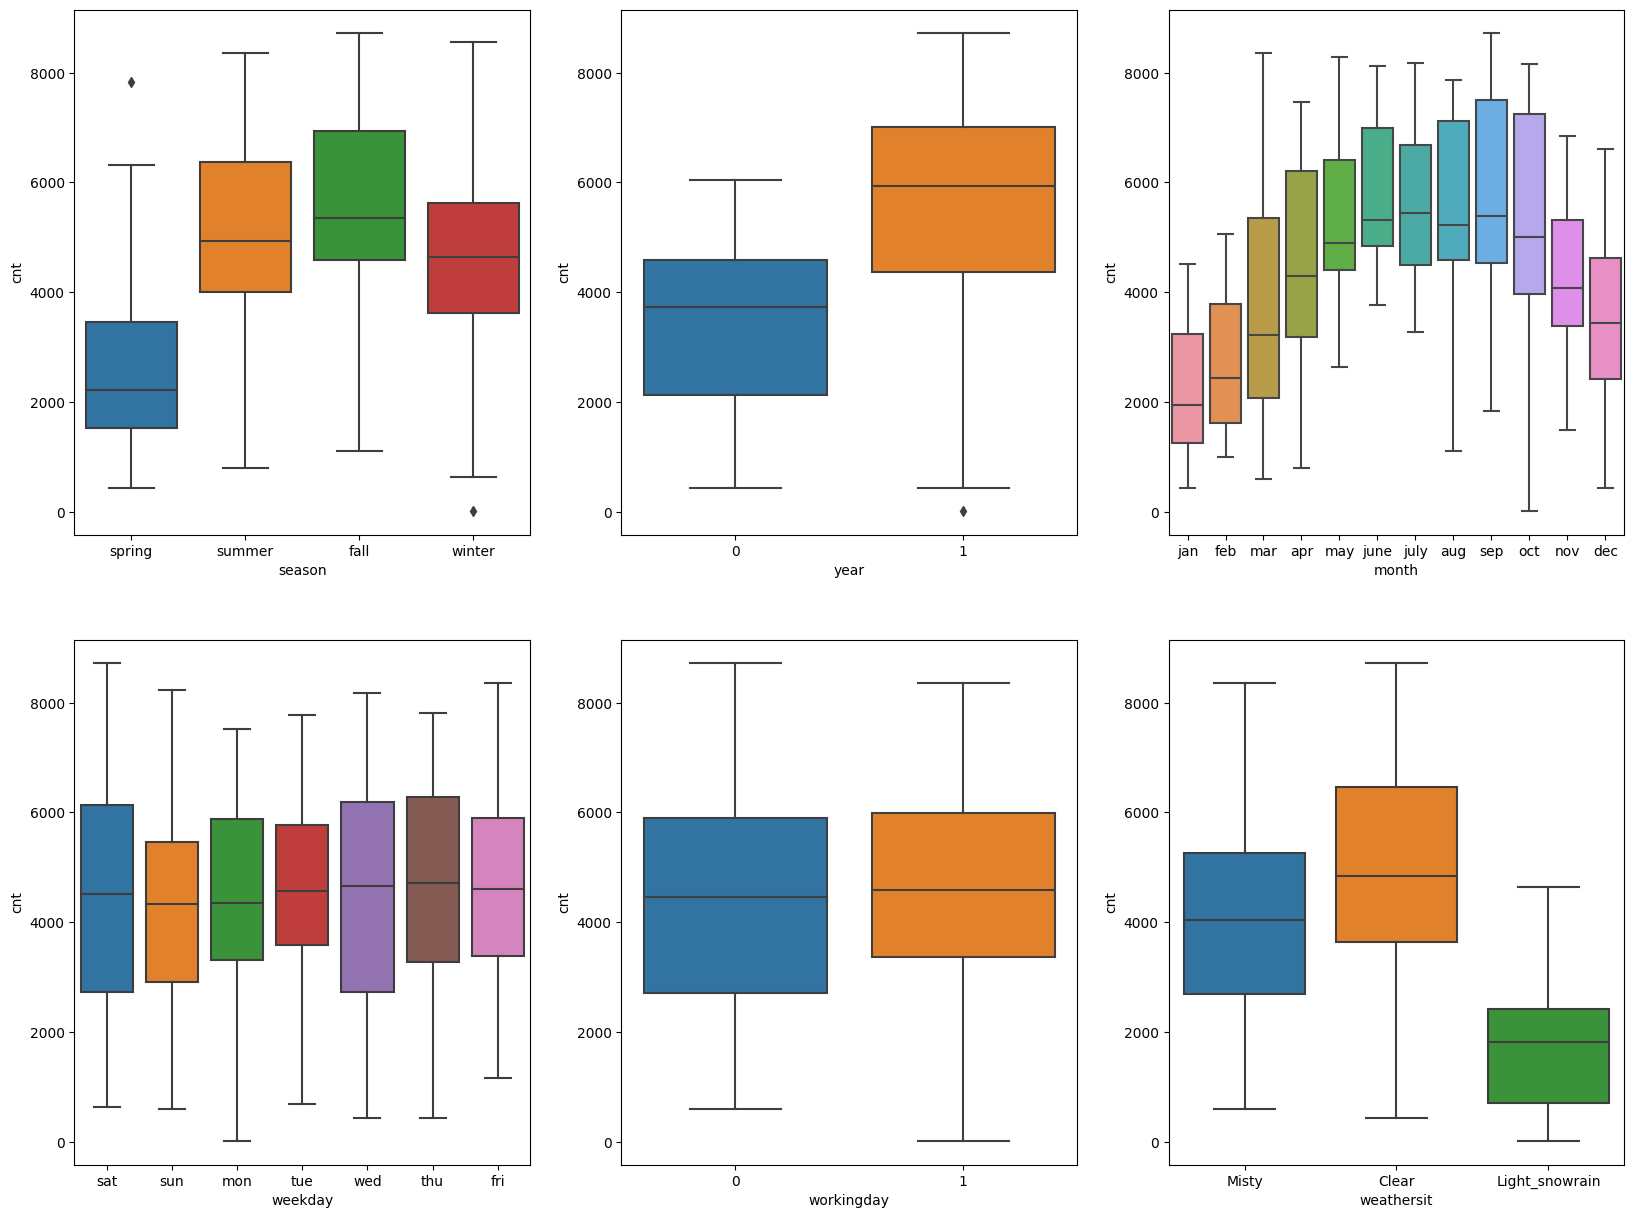

In [212]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=sample_bike_data)

plt.subplot(2,3,2)
sns.boxplot(x='year',y='cnt',data=sample_bike_data)

plt.subplot(2,3,3)
sns.boxplot(x='month',y='cnt',data=sample_bike_data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=sample_bike_data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=sample_bike_data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=sample_bike_data)

<Figure size 2000x1500 with 0 Axes>

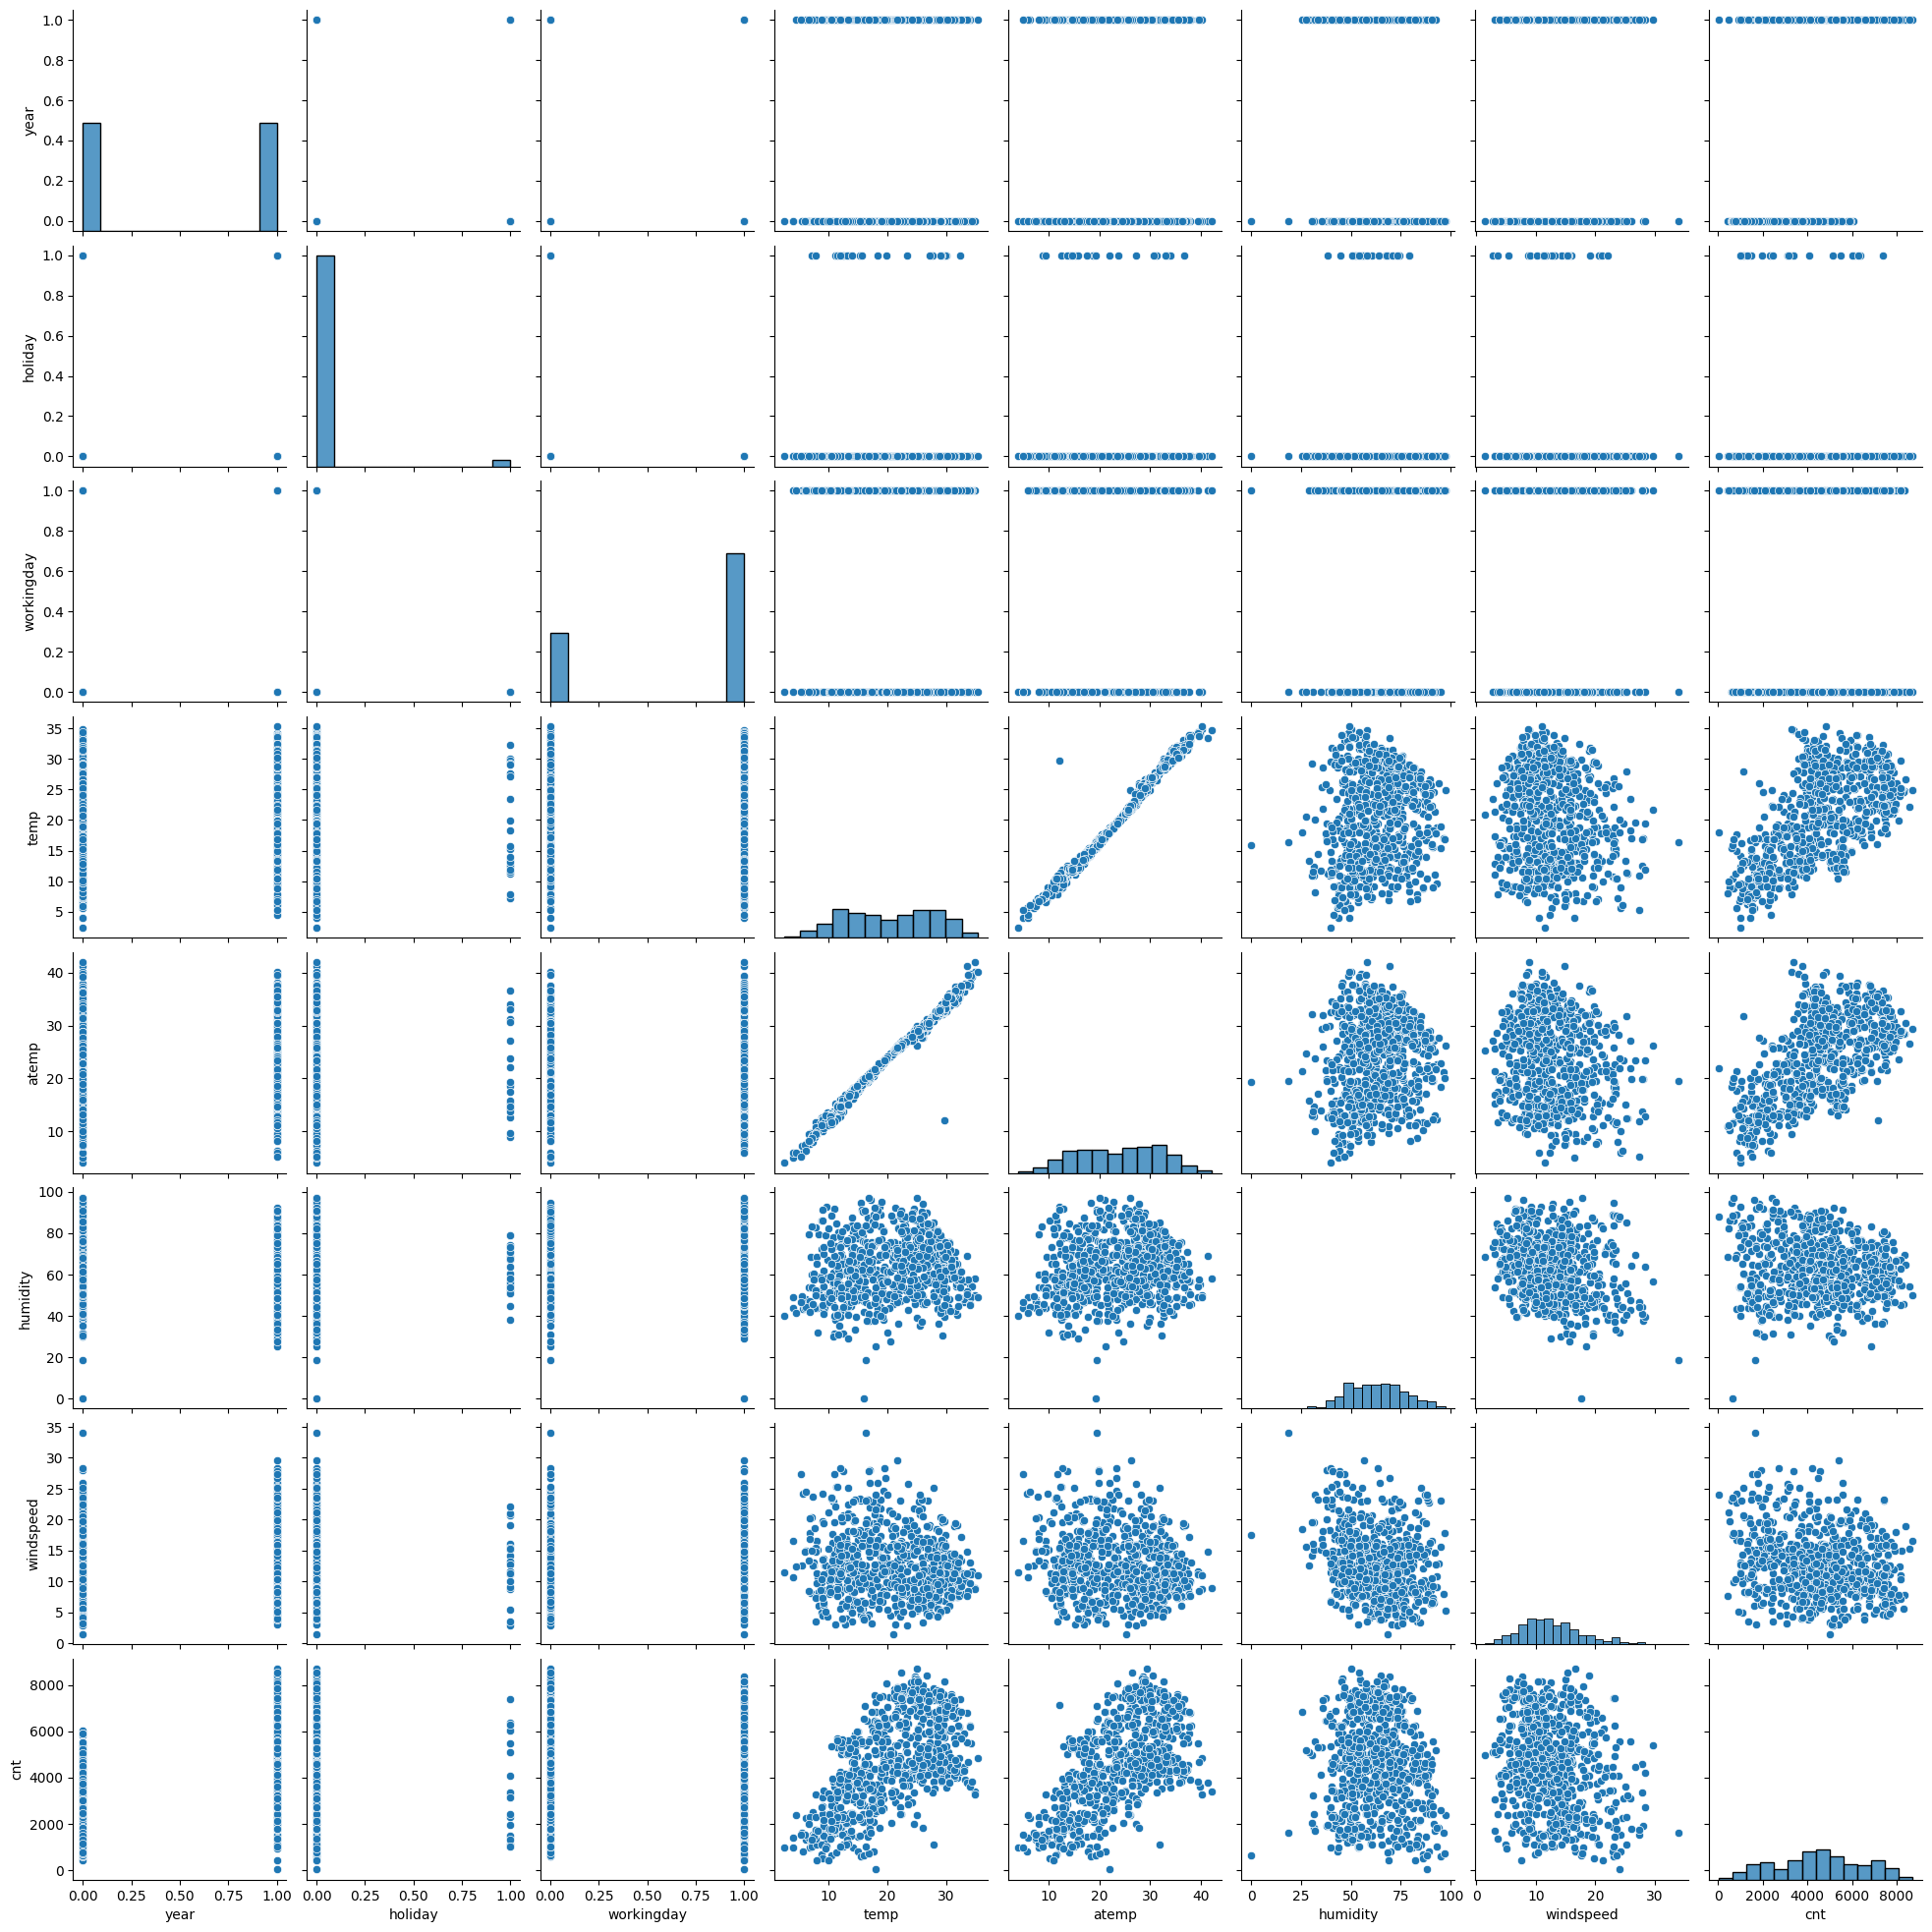

In [213]:
plt.figure(figsize=(20,15))
sns.pairplot(sample_bike_data)
plt.show()

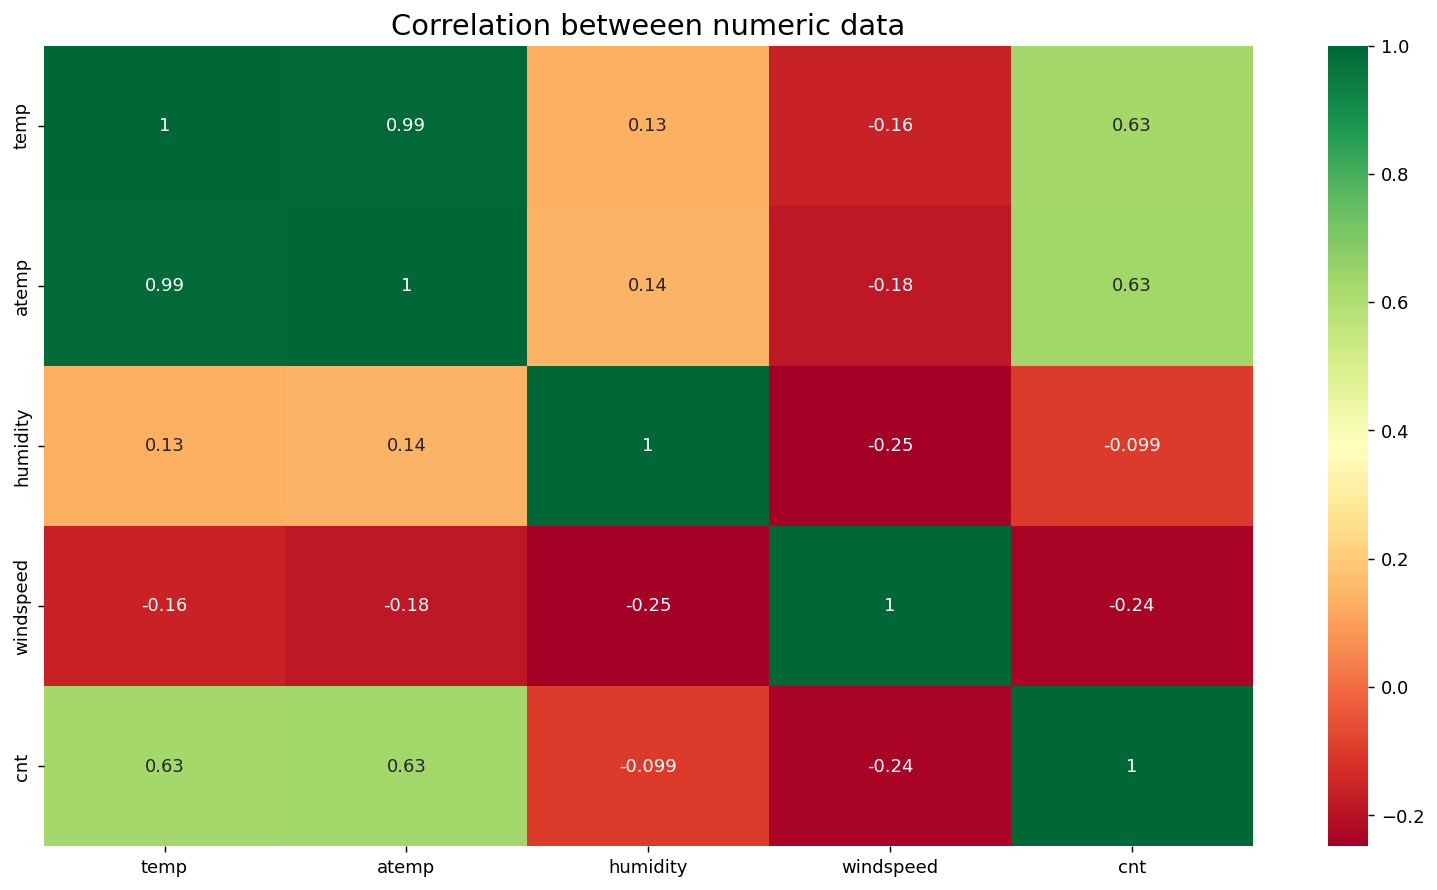

In [214]:
num_features = ['temp','atemp','humidity','windspeed','cnt']
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric data",fontsize=16)
sns.heatmap(sample_bike_data[num_features].corr(),annot= True,cmap="RdYlGn")
plt.show()

## Step 3: Data Preparation

In [215]:
months_sample_bike_data=pd.get_dummies(sample_bike_data.month,drop_first=True)
weekdays_sample_bike_data=pd.get_dummies(sample_bike_data.weekday,drop_first=True)
weathersit_sample_bike_data=pd.get_dummies(sample_bike_data.weathersit,drop_first=True)
seasons_sample_bike_data=pd.get_dummies(sample_bike_data.season,drop_first=True)

In [216]:
sample_bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [217]:
sample_bike_data_new = pd.concat([sample_bike_data,months_sample_bike_data,weekdays_sample_bike_data,weathersit_sample_bike_data,seasons_sample_bike_data],axis=1)

In [218]:
sample_bike_data_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [219]:
sample_bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [220]:
sample_bike_data_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [221]:
sample_bike_data_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [222]:
sample_bike_data_new.shape

(730, 30)

In [223]:
sample_bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

In [224]:
np.random.seed(0)
sample_bike_data_train, sample_bike_data_test = train_test_split(sample_bike_data_new, train_size = 0.7, random_state = 100)

In [225]:
sample_bike_data_train.shape

(510, 30)

In [226]:
sample_bike_data_test.shape

(220, 30)

In [227]:
scaler = MinMaxScaler()

In [228]:
sample_bike_data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [229]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
sample_bike_data_train[num_vars] = scaler.fit_transform(sample_bike_data_train[num_vars])

In [230]:
sample_bike_data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [231]:
sample_bike_data_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


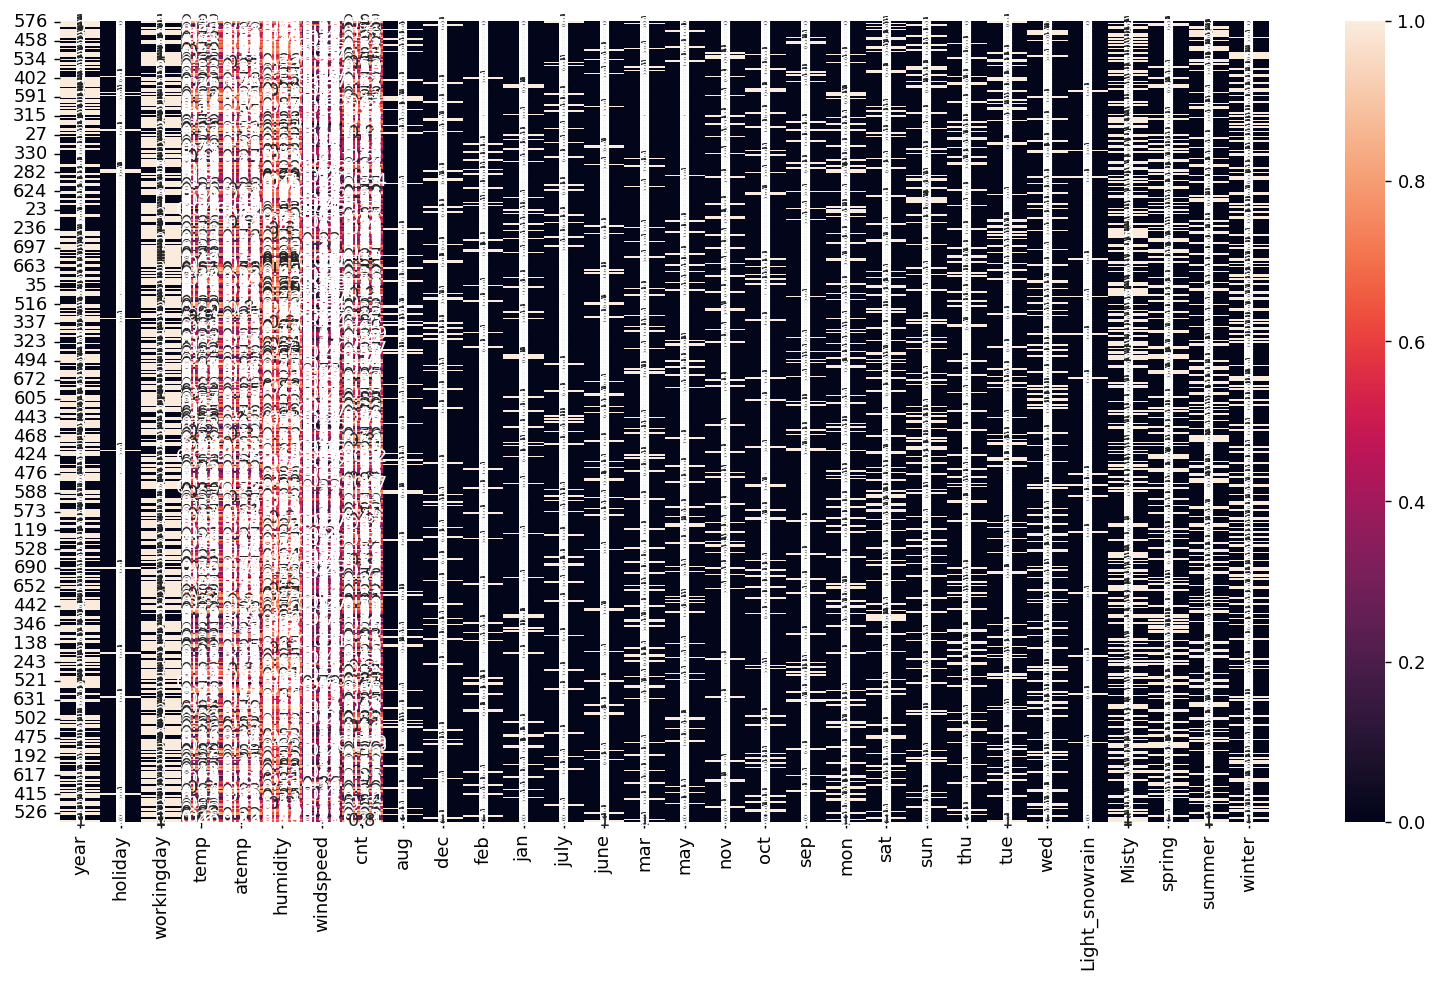

In [232]:
plt.figure(figsize=(15,8),dpi=130)
sns.heatmap(sample_bike_data_train, annot = True)
plt.show()

In [233]:

sample_bike_data_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


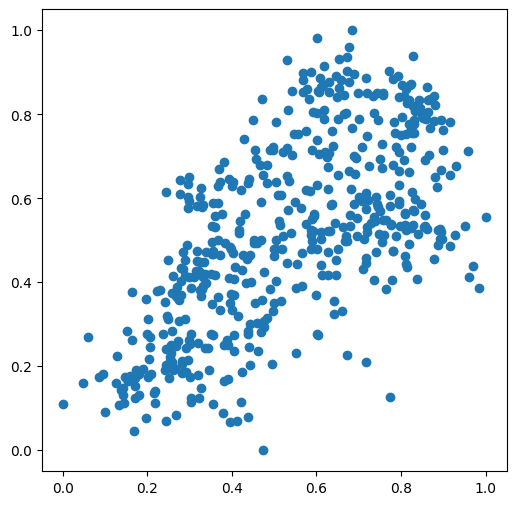

In [234]:
plt.figure(figsize=[6,6])
plt.scatter(sample_bike_data_train.temp, sample_bike_data_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [235]:
y_train = sample_bike_data_train.pop('cnt')
X_train = sample_bike_data_train

In [236]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [237]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [238]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 10),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 6),
 ('tue', False, 5),
 ('wed', False, 7),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [239]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'dec', 'feb', 'jan', 'july', 'may', 'nov', 'sep', 'sat',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [240]:
X_train.columns[~rfe.support_]

Index(['aug', 'june', 'mar', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed'], dtype='object')

In [241]:
def calculateVIF(sample_bike_data):
    vif = pd.DataFrame()
    vif['Features'] = sample_bike_data.columns
    vif['VIF'] = [variance_inflation_factor(sample_bike_data.values, i) for i in range(sample_bike_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [242]:
X_train_rfe = X_train[col]

In [243]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,379.77
4,atemp,368.95
5,humidity,31.79
17,spring,5.73
2,workingday,5.40
6,windspeed,5.13
19,winter,4.28
18,summer,3.59
9,jan,2.40
16,Misty,2.33


In [244]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          6.28e-188
Time:                        12:07:31   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2973      0.039      7.

In [245]:
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,temp,372.18
4,atemp,368.36
2,workingday,5.37
5,windspeed,5.08
16,spring,4.71
18,winter,3.27
17,summer,3.10
8,jan,2.24
0,year,2.09
13,sat,2.01


In [246]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.87e-185
Time:                        12:07:31   Log-Likelihood:                 516.82
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     490   BIC:                            -908.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2216      0.034      6.

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [247]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.87e-185
Time:                        12:07:31   Log-Likelihood:                 516.82
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     490   BIC:                            -908.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2216      0.034      6.

In [248]:
X_train_new = X_train_new.drop(['dec'], axis = 1)

calculateVIF(X_train_new)

,Features,VIF
3,temp,371.73
4,atemp,368.28
2,workingday,5.27
5,windspeed,5.08
15,spring,4.40
16,summer,3.10
17,winter,2.65
0,year,2.09
7,jan,2.08
12,sat,1.98


In [249]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.50e-184
Time:                        12:07:31   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     491   BIC:                            -905.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1855      0.033      5.

In [250]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

calculateVIF(X_train_new)

,Features,VIF
3,temp,371.66
4,atemp,367.86
2,workingday,5.23
5,windspeed,5.06
15,summer,3.09
14,spring,2.99
16,winter,2.65
0,year,2.08
11,sat,1.97
9,nov,1.60


In [251]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.98e-184
Time:                        12:07:31   Log-Likelihood:                 509.07
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     492   BIC:                            -905.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1642      0.031      5.

In [252]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,371.65
4,atemp,366.31
2,workingday,5.23
5,windspeed,5.06
13,spring,2.89
14,summer,2.77
15,winter,2.47
0,year,2.08
10,sat,1.97
8,nov,1.60


In [253]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     161.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          5.45e-184
Time:                        12:07:32   Log-Likelihood:                 505.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     493   BIC:                            -904.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1552      0.031      4.

In [254]:
lr_6.params

const             0.155183
year              0.234582
holiday          -0.051328
workingday        0.047596
temp              0.492044
atemp            -0.023256
windspeed        -0.147590
feb               0.007383
may               0.009468
nov              -0.019533
sep               0.087413
sat               0.058776
Light_snowrain   -0.291998
Misty            -0.081528
spring           -0.061159
summer            0.057234
winter            0.100634
dtype: float64

In [255]:
X_train_lm_6

,const,year,holiday,workingday,temp,atemp,windspeed,feb,may,nov,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,1,0.815169,0.766351,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.255342,0,0,0,0,1,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.200348,0.663106,0,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.391735,0.188475,0,0,0,0,1,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.318819,0.380981,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.824359,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.111379,1,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0,0.248216,0.223544,0.431816,0,0,0,0,1,0,1,0,0,1
79,1.0,0,0,1,0.462664,0.434043,0.529881,0,0,0,0,0,0,1,0,1,0


In [256]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

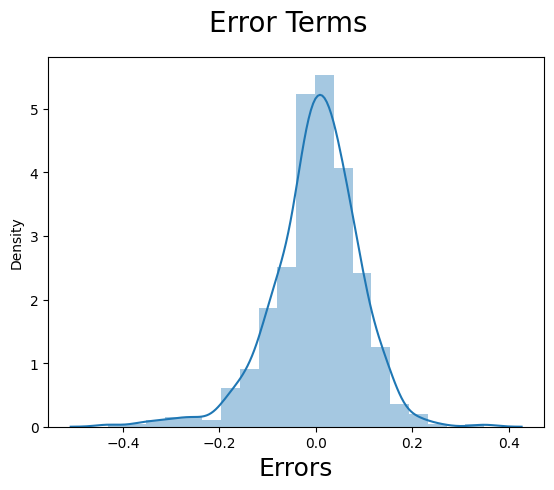

In [257]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [258]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,371.65
4,atemp,366.31
2,workingday,5.23
5,windspeed,5.06
13,spring,2.89
14,summer,2.77
15,winter,2.47
0,year,2.08
10,sat,1.97
8,nov,1.60


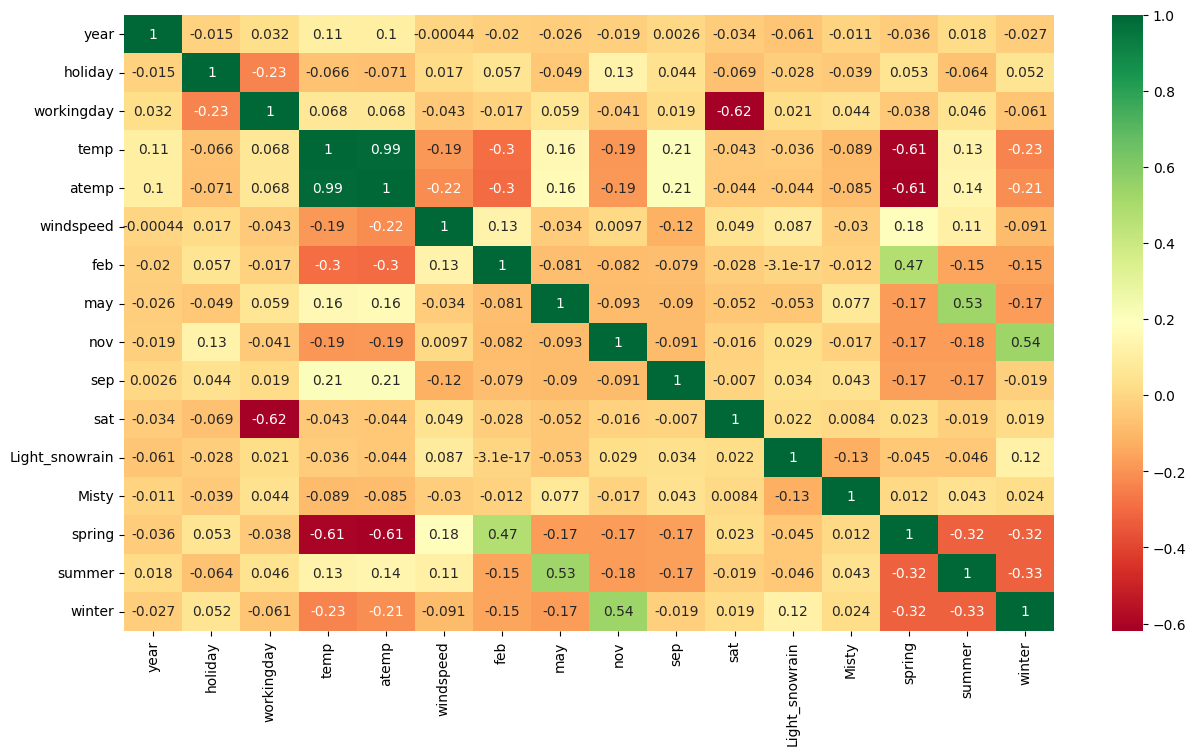

In [259]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

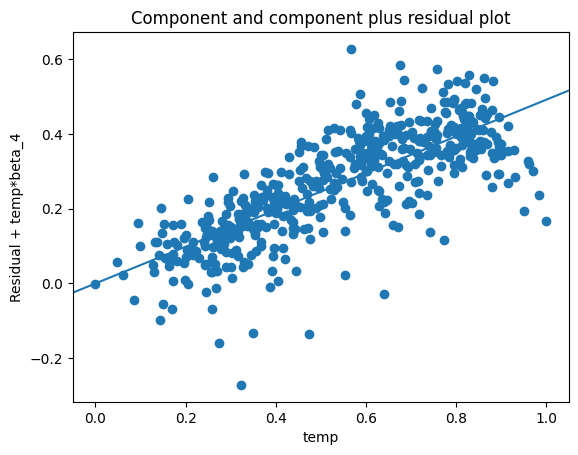

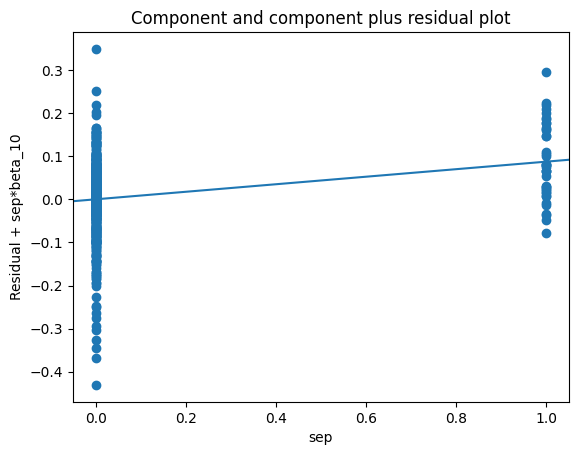

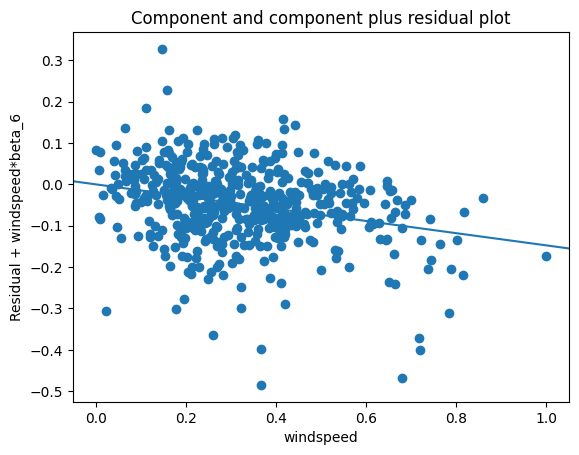

In [260]:
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

In [261]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
sample_bike_data_test[num_vars] = scaler.transform(sample_bike_data_test[num_vars])
sample_bike_data_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [262]:
sample_bike_data_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
y_test = sample_bike_data_test.pop('cnt')
X_test = sample_bike_data_test
X_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [264]:
col1 = X_train_new.columns

X_test = X_test[col1]

X_test_lm_6 = sm.add_constant(X_test)

In [265]:
y_pred = lr_6.predict(X_test_lm_6)

In [266]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8094

Text(0, 0.5, 'y_pred')

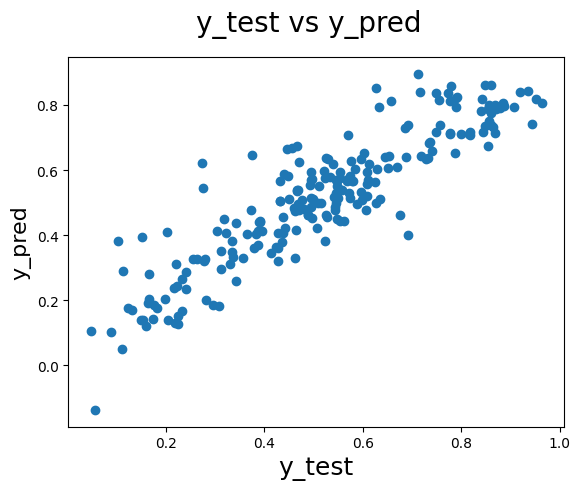

In [267]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [268]:
round(lr_6.params,4)

const             0.1552
year              0.2346
holiday          -0.0513
workingday        0.0476
temp              0.4920
atemp            -0.0233
windspeed        -0.1476
feb               0.0074
may               0.0095
nov              -0.0195
sep               0.0874
sat               0.0588
Light_snowrain   -0.2920
Misty            -0.0815
spring           -0.0612
summer            0.0572
winter            0.1006
dtype: float64

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [269]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


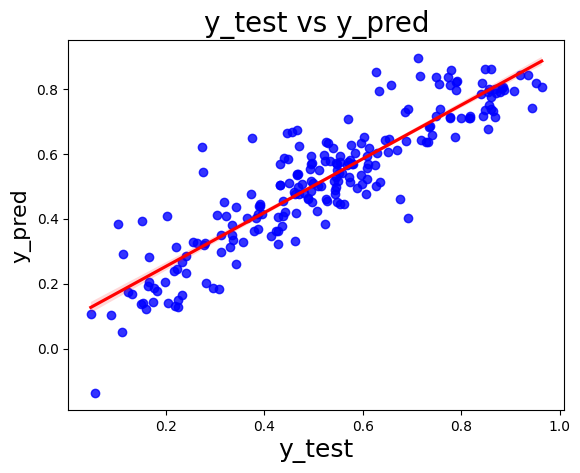

In [270]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Final Conclusion : The demand for shared bikes in the American market depends on key factors: Year (indicating temporal influences), Holiday (with potential for targeted promotions), Temperature (favoring warmer weather), Windspeed (weather impact), Specific Months (highlighting seasonality), Weather Situations (considering adverse conditions), Day of the Week (Sunday trend), and Seasons (adapting strategies based on seasonal trends). BoomBikes can use these insights to tailor marketing and operations for post-lockdown scenarios.

Prepared by:

Prashanth Reddy K